# Debates about increasing minimum wage in the Netherlands

(Last updated: Jun 12, 2024)


The debate over increasing the minimum wage is a contentious issue that spans economic, social, and political spheres. Proponents argue that raising the minimum wage is essential for ensuring a livable income for workers, reducing poverty, and stimulating economic growth. They assert that higher wages lead to increased consumer spending, which benefits businesses and the economy overall. Additionally, it is believed that fair wages can improve employee morale and productivity, reducing turnover rates and related costs for employers.

On the other hand, opponents of increasing the minimum wage contend that higher labor costs can lead to job losses, particularly for low-skilled workers, as businesses might reduce their workforce or increase automation to offset the increased expenses. They also argue that small businesses, which operate on thin margins, could be disproportionately affected, potentially leading to closures or reduced hiring. There is also concern that higher wages could lead to inflation, as businesses pass on the increased costs to consumers through higher prices.

## Consumer spending and Minimum wage in the Netherlands
The plot below presents the trends in consumer spending and minimum wage over several decades. The blue line represents consumer spending in billions of US dollars, while the red line shows the minimum wage per month in US dollars. This visualization aims to explore the potential correlation between the minimum wage and consumer spending patterns over time.

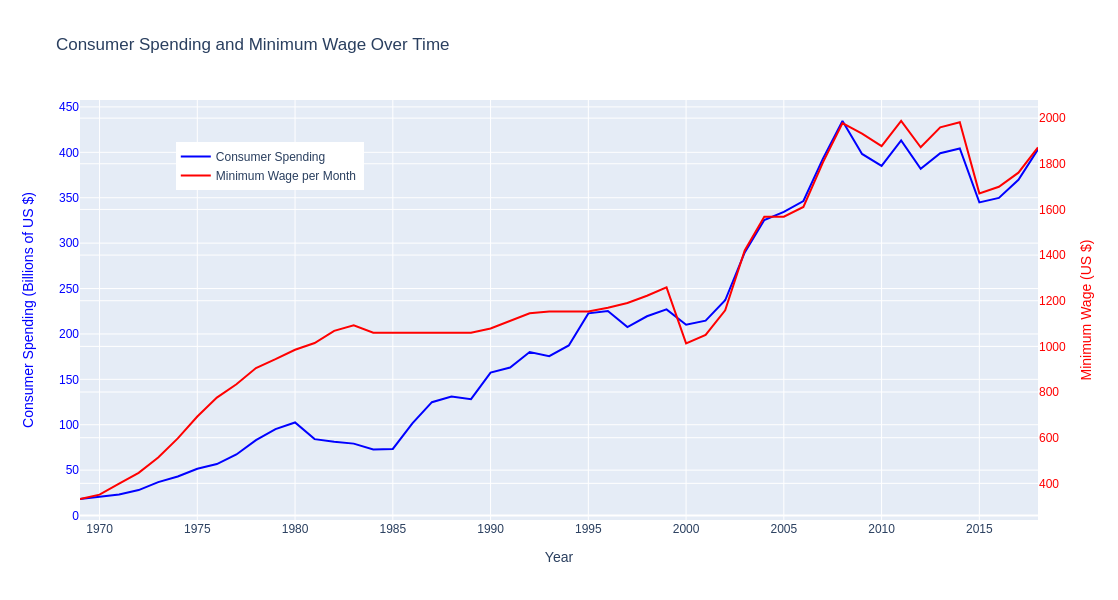

In [9]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Exchange rates from euros to dollars for each year. Source : https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart
exchange_rates = {
    1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
    1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
    1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
    1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
    1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
    2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
    2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

def plot_consumer_spending_and_minimum_wage():
    minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
    consumer_spending_df = pd.read_csv("netherlands-consumer-spending.csv")

    consumer_spending_df['year'] = consumer_spending_df['year'].str[:4]
    minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
    consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

    minimum_wage_df['minimum wage per month (dollar)'] = minimum_wage_df.apply(
        lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']), axis=1
    )

    merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df[' Billions of US $'],
                             mode='lines', name='Consumer Spending',
                             line=dict(color='blue', width=2),
                             yaxis='y1'))

    fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df['minimum wage per month (dollar)'],
                             mode='lines', name='Minimum Wage per Month',
                             line=dict(color='red', width=2),
                             yaxis='y2'))

    fig.update_layout(
        title='Consumer Spending and Minimum Wage Over Time',
        xaxis_title='Year',
        yaxis=dict(
            title='Consumer Spending (Billions of US $)',
            titlefont=dict(color='blue'),
            tickfont=dict(color='blue')
        ),
        yaxis2=dict(
            title='Minimum Wage (US $)',
            titlefont=dict(color='red'),
            tickfont=dict(color='red'),
            overlaying='y',
            side='right'        ),
        legend=dict(x=0.1, y=0.9),
        height=600
    )

    fig.show()

plot_consumer_spending_and_minimum_wage()

The graph reveals a generally positive correlation between consumer spending and the minimum wage. As the minimum wage increases, consumer spending also tends to rise, suggesting that higher minimum wages may contribute to greater overall economic activity. However, the relationship is not perfectly linear, indicating that other economic factors likely influence consumer spending alongside changes in the minimum wage.

## Minimum wage and GDP per country
The maps below present a visual comparison of minimum wage and GDP per capita across different countries for the years 2001-2018. The first map illustrates the minimum wage in US dollars, while the second map shows GDP per capita. By examining these maps, one can gain insights into the economic landscape of various countries and the potential impact of minimum wage policies on economic performance.

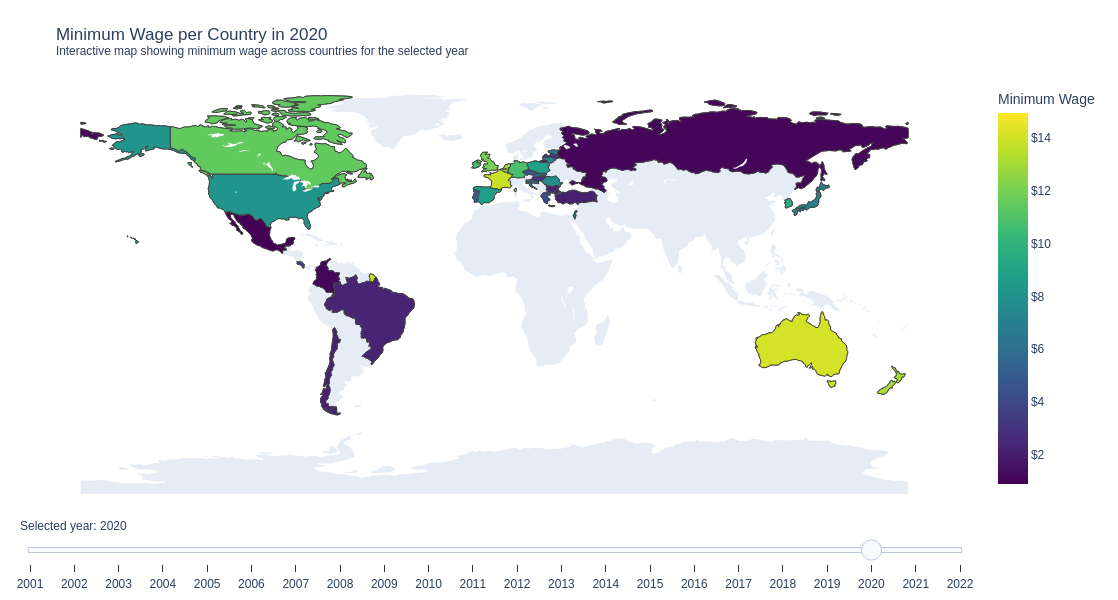

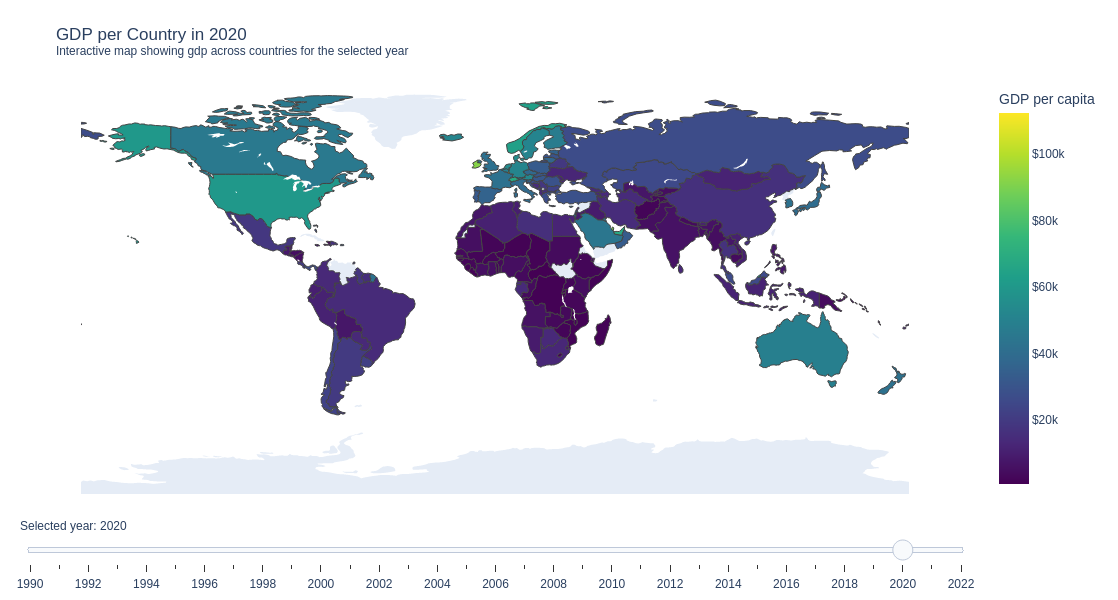

In [10]:
df_minimum_wage = pd.read_csv('minimum_wage_worldwide.csv')

df_minimum_wage_2020 = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] == 2020]

df_gdp = pd.read_csv('gdp-per-capita-worldbank.csv')

def make_title(year: int, measure: str) -> str:
    return f'{measure} per Country in {year}' + \
           '<br><sup>Interactive map showing ' + measure.lower() + ' across countries for the selected year</sup>'

minimum_wage_years = sorted(df_minimum_wage['TIME_PERIOD'].unique())

minimum_wage_traces = []
for i, year in enumerate(minimum_wage_years):
    df_minimum_wage_year = df_minimum_wage[df_minimum_wage['TIME_PERIOD'] == year]
    minimum_wage_trace = go.Choropleth(
        locations=df_minimum_wage_year['REF_AREA'],
        locationmode='ISO-3',
        z=df_minimum_wage_year['OBS_VALUE'],
        colorscale='Viridis',
        hovertemplate='<b>%{location}</b><br>Minimum wage: %{z}<extra></extra>',
        visible=(True if year == 2020 else False), 
        colorbar=go.choropleth.ColorBar(
            title='Minimum Wage',
            tickprefix='$'
        ),
    )
    minimum_wage_traces.append(minimum_wage_trace)

gdp_years = sorted(df_gdp['Year'].unique())

gdp_traces = []
for i, year in enumerate(gdp_years):
    df_gdp_year = df_gdp[df_gdp['Year'] == year]
    gdp_trace = go.Choropleth(
        locations=df_gdp_year['Code'],
        z=df_gdp_year["GDP per capita, PPP (constant 2017 international $)"],
        text=df_gdp_year['Entity'],
        colorscale='Viridis',
        hovertemplate='<b>%{text}</b><br>GDP per capita: %{z}<extra></extra>',
        visible=(True if year == 2020 else False),
        colorbar=go.choropleth.ColorBar(
            title='GDP per capita',
            tickprefix='$'
        ),
    )
    gdp_traces.append(gdp_trace)

minimum_wage_slider_steps = []
for i, year in enumerate(minimum_wage_years):
    minimum_wage_slider_steps.append({
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(minimum_wage_traces))]},
            {'title': make_title(year, 'Minimum Wage')}
        ],
        'label': str(year)
    })

gdp_slider_steps = []
for i, year in enumerate(gdp_years):
    gdp_slider_steps.append({
        'method': 'update',
        'args': [
            {'visible': [i == j for j in range(len(gdp_traces))]},
            {'title': make_title(year, 'GDP')}
        ],
        'label': str(year)
    })

fig_minimum_wage = go.Figure(
    data=minimum_wage_traces,
    layout=go.Layout(
        width=600,
        height=600,
        title=make_title(2020, 'Minimum Wage'),
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        sliders=[{
            'active': minimum_wage_years.index(2020),
            'currentvalue': {'prefix': 'Selected year: '},
            'steps': minimum_wage_slider_steps
        }],
        margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
    )
)

fig_gdp = go.Figure(
    data=gdp_traces,
    layout=go.Layout(
        width=600,
        height=600,
        title=make_title(2020, 'GDP'),
        geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
        sliders=[{
            'active': gdp_years.index(2020),
            'currentvalue': {'prefix': 'Selected year: '},
            'steps': gdp_slider_steps
        }],
        margin={'t': 80, 'r': 20, 'b': 80, 'l': 20}
    )
)

fig_minimum_wage.show()
fig_gdp.show()

From the maps, it is evident that there is significant variation in both minimum wage levels and GDP per capita across countries. Countries with higher GDP per capita tend to have higher minimum wages, indicating a potential correlation between economic prosperity and wage policies. However, there are also exceptions, suggesting that other factors, such as cost of living and economic structure, play a crucial role in determining minimum wage levels. This analysis provides a foundational understanding for discussions on the implications of raising minimum wages in different economic contexts.

## Percentage of Workers Earning Minimum Wage by Age Range in 2018 in the Netherlands
The below graph provides an insightful look into the distribution of minimum wage workers across various age groups. The highest percentage of minimum wage workers is in the "20 to 25 years" age range, approaching 20%. Younger age groups, "0 to 15 years" and "15 to 20 years," also show high percentages above 15%. From "25 to 60 years," the percentages remain low, around 5% or less. There’s a noticeable rise in the "65 to 75 years" age range, nearing 10%, and the "75 years or older" group also approaches 20%. 

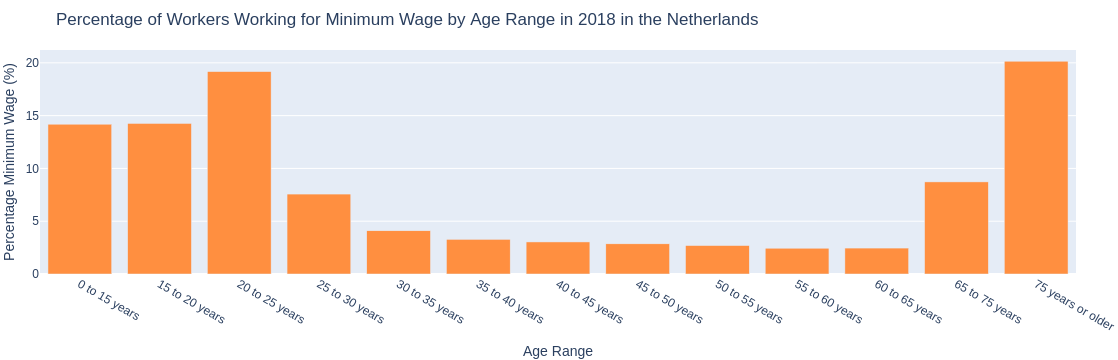

In [11]:
# Read the data
data = pd.read_csv('minimumloon_werknemers.csv')

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Create the bar chart using Plotly
fig = px.bar(
    df,
    x="age",
    y="percentage_minimum_wage",
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    labels={"percentage_minimum_wage": "Percentage Minimum Wage (%)", "Age Range": "Age Range"}
)

# Update the bar chart to remove the legend and set all bars to the same color
fig.update_traces(marker_color='#ff8f40', showlegend=False)

# Update layout for better presentation
fig.update_layout(
    xaxis_title='Age Range',
    yaxis_title='Percentage Minimum Wage (%)',
    title="Percentage of Workers Working for Minimum Wage by Age Range in 2018 in the Netherlands",
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

This graph indicates that the majority of people in the Netherlands do not work for minimum wage. This conclusion is based on the observation that, for most age ranges depicted in the graph, the percentage of workers earning minimum wage is significantly below 20%

## Minimum Wage per Month and Theft/Break-ins
The graph illustrates the relationship between minimum wage per month and the incidence of thefts and break-ins from 2013 to 2018. This data provides an overview of how changes in minimum wage levels might correlate with crime rates, particularly property crimes such as thefts and break-ins.

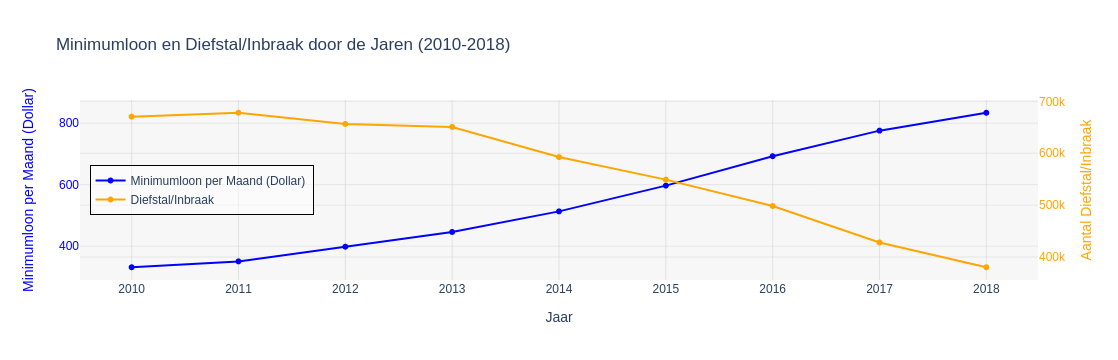

In [12]:
# Exchange rates from euros to dollars for each year. Source : https://www.macrotrends.net/2548/euro-dollar-exchange-rate-historical-chart
exchange_rates = {
    1969: 1.1747, 1970: 1.1747, 1971: 1.1747, 1972: 1.1747, 1973: 1.1747, 1974: 1.1747, 1975: 1.1747,
    1976: 1.1747, 1977: 1.1747, 1978: 1.1747, 1979: 1.1747, 1980: 1.1747, 1981: 1.1747, 1982: 1.1747,
    1983: 1.1747, 1984: 1.1747, 1985: 1.1747, 1986: 1.1747, 1987: 1.1747, 1988: 1.1747, 1989: 1.1747,
    1990: 1.1747, 1991: 1.1747, 1992: 1.1747, 1993: 1.1747, 1994: 1.1747, 1995: 1.1747, 1996: 1.1747,
    1997: 1.1747, 1998: 1.1747, 1999: 1.1747, 2000: 0.92, 2001: 0.90, 2002: 0.95, 2003: 1.13, 2004: 1.24,
    2005: 1.24, 2006: 1.26, 2007: 1.38, 2008: 1.47, 2009: 1.39, 2010: 1.33, 2011: 1.39, 2012: 1.29,
    2013: 1.33, 2014: 1.33, 2015: 1.11, 2016: 1.11, 2017: 1.13, 2018: 1.18
}

def convert_euro_to_dollar(year, amount_euro):
    return amount_euro * exchange_rates.get(year, 1)

# Read the theft and burglary data from CSV file
data = pd.read_csv('theft_and_burglary.csv')

# Extracting the data from the DataFrame
jaren = data['year'].tolist()
diefstal_inbraak = data['theft_and_burglary'].tolist()

# Read the minimum wage data from CSV file and convert to dollars
minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
minimum_wage_df['minimum wage per month (dollar)'] = minimum_wage_df.apply(
    lambda row: convert_euro_to_dollar(row['year'], row['minimum wage per month (euro)']), axis=1
)

# Extracting the minimum wage data in dollars
min_wage_month = minimum_wage_df['minimum wage per month (dollar)'].tolist()

fig = go.Figure()

fig.add_trace(go.Scatter(x=jaren, y=min_wage_month, mode='lines+markers', name='Minimumloon per Maand (Dollar)', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=jaren, y=diefstal_inbraak, mode='lines+markers', name='Diefstal/Inbraak', line=dict(color='orange'), yaxis='y2'))

fig.update_layout(
    yaxis=dict(
        title='Minimumloon per Maand (Dollar)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        gridcolor='lightgrey',
        gridwidth=0.5
    ),
    yaxis2=dict(
        title='Aantal Diefstal/Inbraak',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right',
        gridcolor='lightgrey',
        gridwidth=0.5
    ),
    title='Minimumloon en Diefstal/Inbraak door de Jaren (2010-2018)',
    
    xaxis_title='Jaar',
    xaxis=dict(
        gridcolor='lightgrey',
        gridwidth=0.6
    ),
    legend=dict(
        x=0.01,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.5)'
)

fig.show()


The graph shows a clear trend where the minimum wage increases steadily from 2013 to 2018, while at the same time, the number of thefts and break-ins decreases. This inverse relationship suggests that higher minimum wages may contribute to a reduction in property crimes. By improving the financial stability of low-income workers, increasing the minimum wage might reduce the incentive for engaging in criminal activities. This finding supports arguments that raising the minimum wage can have broader social benefits beyond just economic improvements for workers.

## Impact of minimum wage on the unemployment rate
The plot below illustrates the relationship between the unemployment rate and the minimum wage over a series of years. The blue bars represent the unemployment rate as a percentage, while the green bars indicate the minimum wage in euros per month. This visualization aims to provide insights into how changes in the minimum wage might correlate with fluctuations in the unemployment rate.


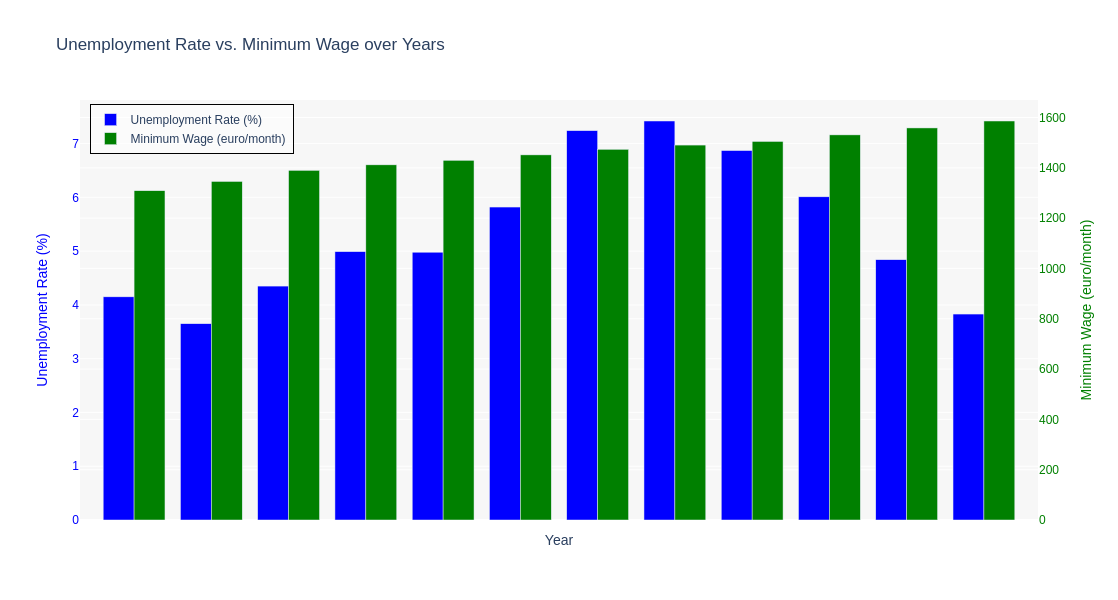

In [13]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the datasets
minimum_wage_df = pd.read_csv("minimum_wage_data.csv")
consumer_spending_df = pd.read_csv("netherlands-unemployment-rate.csv")

# Convert 'year' column to integers in both datasets
minimum_wage_df['year'] = minimum_wage_df['year'].astype(int)
consumer_spending_df['year'] = consumer_spending_df['year'].astype(int)

# Merge the datasets on 'year'
merged_df = pd.merge(consumer_spending_df, minimum_wage_df, on='year')

# Filter data from 2007 onwards
merged_df = merged_df[merged_df['year'] >= 2007]

# Prepare the data for plotting
years = merged_df['year']
unemployment_rate = merged_df[' Unemployment Rate (%)']
minimum_wage = merged_df['minimum wage per month (euro)']

# Create an index for the x-axis positions
index = np.arange(len(years))

# Create an interactive plotly figure
fig = go.Figure()

# Plotting the bars for unemployment rate
fig.add_trace(go.Bar(
    x=years - 0.2,
    y=unemployment_rate,
    name='Unemployment Rate (%)',
    marker=dict(color='blue'),
    yaxis='y1',
    width=0.4
))

# Plotting the bars for minimum wage
fig.add_trace(go.Bar(
    x=years + 0.2,
    y=minimum_wage,
    name='Minimum Wage (euro/month)',
    marker=dict(color='green'),
    yaxis='y2',
    width=0.4
))

# Updating the layout to include dual y-axes
fig.update_layout(
    title='Unemployment Rate vs. Minimum Wage over Years',
    xaxis=dict(
        title='Year',
        tickmode='array',
        tickvals=index,
        ticktext=years,
        tickangle=45
    ),
    yaxis=dict(
        title='Unemployment Rate (%)',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        side='left'
    ),
    yaxis2=dict(
        title='Minimum Wage (euro/month)',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='black',
        borderwidth=1
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.5)',
    barmode='group',
    bargap=0.15,
    height=600
)

fig.show()

From the graph, it is evident that there is no consistent pattern indicating that higher minimum wages lead to higher unemployment rates or vice versa. In some years, increases in the minimum wage coincide with higher unemployment rates, while in other years, they do not. This suggests that other factors may also play significant roles in influencing unemployment rates, and the impact of minimum wage adjustments on employment is complex and multifaceted.